WILL START PROJECT FROM HERE 


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [10]:
file_paths = "D:/AI_CNN/nsl-kdd/KDDTrain+_20Percent._csv.csv"

data = pd.read_csv(file_paths)

print(data.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [11]:
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable


categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

X_preprocessed = preprocessor.fit_transform(X)


one_hot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].categories_
one_hot_feature_names = [f"{col}_{val}" for col, vals in zip(categorical_cols, one_hot_features) for val in vals]

feature_names = one_hot_feature_names + numerical_cols

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

preprocessed_data = pd.concat([X_preprocessed_df, y], axis=1)

print(preprocessed_data.head())

   protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0                 0.0                1.0                0.0          0.0   
1                 0.0                0.0                1.0          0.0   
2                 0.0                1.0                0.0          0.0   
3                 0.0                1.0                0.0          0.0   
4                 0.0                1.0                0.0          0.0   

   service_X11  service_Z39_50  service_auth  service_bgp  service_courier  \
0          0.0             0.0           0.0          0.0              0.0   
1          0.0             0.0           0.0          0.0              0.0   
2          0.0             0.0           0.0          0.0              0.0   
3          0.0             0.0           0.0          0.0              0.0   
4          0.0             0.0           0.0          0.0              0.0   

   service_csnet_ns  ...  dst_host_srv_count  dst_host_same_srv_rate  \
0 

In [12]:
# # Save the preprocessed data to a new CSV file
# preprocessed_data.to_csv('preprocessed_dataset.csv', index=False)


TILL HERE DATA GOT PREPROCESSED AND  PLACED IN THE NEW CSV FILE 
`

SPLITTING OF DATASET IN TEST  AND TRAINING SET

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (20153, 118), y_train shape: (20153,)
X_test shape: (5039, 118), y_test shape: (5039,)


1.RandomForestClassifier is imported from scikit-learn's ensemble module.

2.n_estimators=100 specifies the number of trees in the Random Forest.

3.min_samples_leaf=3 sets the minimum number of samples required to be at a leaf node. This parameter helps control overfitting.

In [14]:
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=42)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=42)

1.True Positives (TP): The number of instances that are actually anomalies (positive class) and are correctly predicted as anomalies by the model.

2.True Negatives (TN): The number of instances that are actually normal (negative class) and are correctly predicted as normal by the model.

3.False Positives (FP): The number of instances that are actually normal (negative class) but are incorrectly predicted as anomalies by the model.

4.False Negatives (FN): The number of instances that are actually anomalies (positive class) but are incorrectly predicted as normal by the model.

Using these values, we can calculate the following metrics:

Accuracy:

Accuracy
=TP+TN/ (TP + FP + FN + TN) 



In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score,roc_auc_score
from sklearn.pipeline import Pipeline
# Initialize LabelEncoder
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

y_train_encoded, y_test_encoded = train_test_split(y_encoded, test_size=0.2, random_state=42)

rf_classifier_encoded = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=3, random_state=42)
rf_classifier_encoded.fit(X_train, y_train_encoded)

y_pred_encoded = rf_classifier_encoded.predict(X_test)

accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
precision_encoded = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall_encoded = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1_encoded = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
roc_auc_encoded = roc_auc_score(y_test_encoded, y_pred_encoded)


print(f'Accuracy (Encoded): {accuracy_encoded}')
print(f'Precision (Encoded): {precision_encoded}')
print(f'Recall (Encoded): {recall_encoded}')
print(f'F1 Score (Encoded): {f1_encoded}')
print(f'ROC-AUC Score (Encoded): {roc_auc_encoded}')


conf_matrix_encoded = confusion_matrix(y_test_encoded, y_pred_encoded)
print('Confusion Matrix (Encoded):')
print(conf_matrix_encoded)


Accuracy (Encoded): 0.9946417940067473
Precision (Encoded): 0.9946675683650651
Recall (Encoded): 0.9946417940067473
F1 Score (Encoded): 0.9946404733129112
ROC-AUC Score (Encoded): 0.9943894775624958
Confusion Matrix (Encoded):
[[2342   23]
 [   4 2670]]


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 3, 5]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train_encoded)

best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train_encoded)

y_pred_tuned = best_rf_classifier.predict(X_test)


accuracy_tuned = accuracy_score(y_test_encoded, y_pred_tuned)
precision_tuned = precision_score(y_test_encoded, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test_encoded, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test_encoded, y_pred_tuned, average='weighted')
roc_auc_tuned = roc_auc_score(y_test_encoded, y_pred_tuned)

print(f'Tuned Model Accuracy: {accuracy_tuned}')
print(f'Tuned Model Precision: {precision_tuned}')
print(f'Tuned Model Recall: {recall_tuned}')
print(f'Tuned Model F1 Score: {f1_tuned}')
print(f'Tuned Model ROC-AUC Score: {roc_auc_tuned}')

conf_matrix_tuned = confusion_matrix(y_test_encoded, y_pred_tuned)
print('Confusion Matrix (Tuned Model):')
print(conf_matrix_tuned)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 300}
Tuned Model Accuracy: 0.9980154792617583
Tuned Model Precision: 0.9980165455391409
Tuned Model Recall: 0.9980154792617583
Tuned Model F1 Score: 0.9980153810304001
Tuned Model ROC-AUC Score: 0.9979591271993562
Confusion Matrix (Tuned Model):
[[2358    7]
 [   3 2671]]


In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


conf_matrix = confusion_matrix(y_test_encoded, y_pred_tuned)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Model)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_tuned)

roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Model)')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_tuned)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Tuned Model)')
plt.legend(loc="lower left")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_probs_tuned = best_rf_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Model)')
plt.legend(loc="lower right")
plt.show()


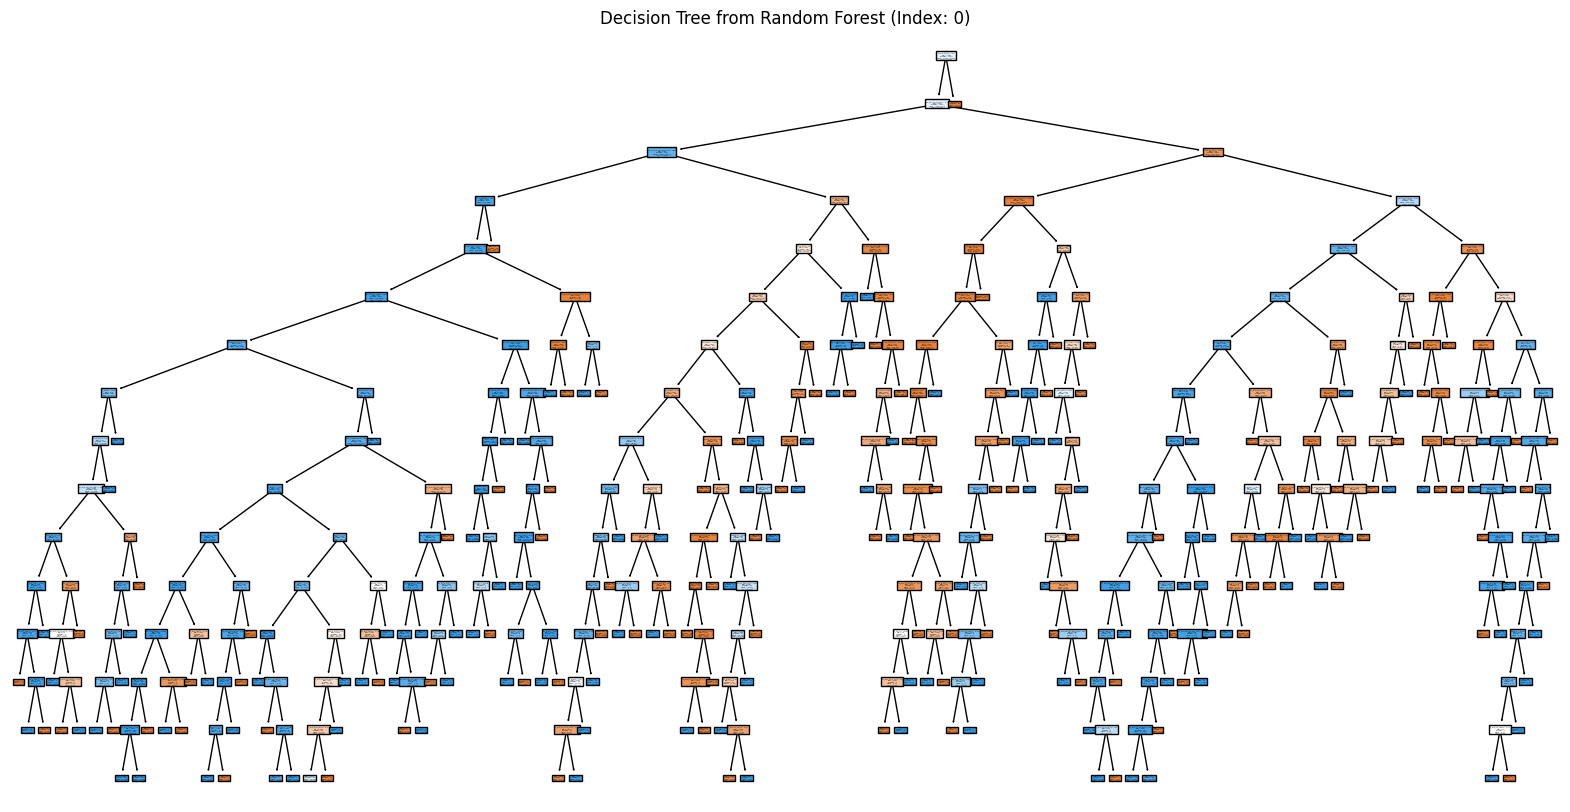

3

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_index = 0  
tree_estimator = best_rf_classifier.estimators_[tree_index]

plt.figure(figsize=(20, 10))
plot_tree(tree_estimator, filled=True, feature_names=X_train.columns, class_names=['Normal', 'Intrusion'])
plt.title('Decision Tree from Random Forest (Index: {})'.format(tree_index))
plt.show()
3

In [20]:
from joblib import dump

# Save the trained model as a pickle file
model_file_path = 'random_forest_model.pkl'
dump(best_rf_classifier, model_file_path)


['random_forest_model.pkl']

In [21]:
from joblib import load

new_data = [[0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.11355065746330564,-0.010092523898063723,-0.03930978546744752,-0.008910476190799476,-0.09122317561979301,-0.006300533079152697,-0.09193335264364132,-0.026220290396778072,-0.8076258173668976,-0.02187260570040307,-0.03937652693489434,-0.027665473285150746,-0.02172416443293537,-0.02780801692954628,-0.01890460127825327,-0.043916784759860654,0.0,0.0,-0.09598961031298031,0.33494747306910133,-0.2994302560181395,1.5954768121252891,1.6002092456433012,-0.3721856030582833,-0.37309834734587105,-1.3888059873425564,0.04277289264179135,-0.37388608116002986,0.7320589271414442,-0.8049465785716378,-0.9350814709251838,-0.17382849806234568,-0.47818309022358074,-0.28799346401714504,1.6038344894474084,1.6144535949611813,-0.3851398434193403,-0.3742807483590511]]

loaded_model = load('random_forest_model.pkl')

predictions = loaded_model.predict(new_data)
if(predictions==1):
    print("Normal.. no intrusion detected")
else :
    print("Intrusion Detected...")
    print("Anomaly detected")

Intrusion Detected...
Anomaly detected


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
